In [1]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn 2.csv to WA_Fn-UseC_-Telco-Customer-Churn 2.csv


In [3]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn 2.csv')

In [4]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values
df.dropna(inplace=True)

# Encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split  # <— This line is crucial

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression  # ← Add this if missing

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Confusion Matrix:
 [[915 118]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC AUC Score: 0.8320917736099105


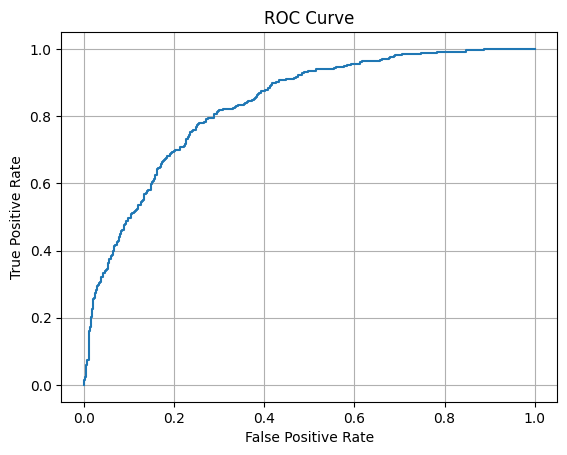

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt  # ← this is the missing import

# Get false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

In [17]:
# Get feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value (strength of influence)
feature_importance['Abs'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Abs', ascending=False, inplace=True)

# Display top features
feature_importance[['Feature', 'Coefficient']].head(10)

,Feature,Coefficient
25,Contract_Two year,-1.288562
10,InternetService_Fiber optic,1.077985
24,Contract_One year,-0.748544
13,OnlineSecurity_Yes,-0.388185
19,TechSupport_Yes,-0.364559
23,StreamingMovies_Yes,0.363966
21,StreamingTV_Yes,0.344132
8,MultipleLines_No phone service,0.340190
9,MultipleLines_Yes,0.282182
26,PaperlessBilling_Yes,0.277857
